### ENEL 645 Assignment #3
Sam Rainbow 

UCID 30084292

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

#### 1. Load Data

In [2]:
# Load the data by looping through the txt files and loading them into a dataframe

# Create a list of the positive and negative reviews
pos_reviews_train = []
pos_reviews_test = []
neg_reviews_train = []
neg_reviews_test = []

# Get the review filenames using os and listdir.
import os
pos_files_1 = os.listdir("test\pos")
pos_files_2 = os.listdir("train\pos")
neg_files_1 = os.listdir("test\\neg")
neg_files_2 = os.listdir("train\\neg")

# A function that will read the reviews at a given path and return a list of the reviews
# The will accept the filepath, the list of txt file names, and the list to append the reviews to
def read_reviews(filepath, file_list, review_list):
    for file in file_list:
        with open(filepath + "\\" + file, encoding="utf8") as f:
            review = f.read()
            review_list.append(review)

# Call the function to read the reviews and append them to the list
read_reviews("test\pos", pos_files_1, pos_reviews_test)
read_reviews("train\pos", pos_files_2, pos_reviews_train)
read_reviews("test\\neg", neg_files_1, neg_reviews_test)
read_reviews("train\\neg", neg_files_2, neg_reviews_train)

##### 2. Data Splitting
We have very little information about the data set or what the "client" wants. The data is initially split 50%/50% training and testing. To ensure that testing distribution is correct we will use the training set for training. We will then use the testing set for testing.

In [4]:
# Create an empty dataframe to store the reviews and their labels
reviews_df_train = pd.DataFrame(columns=["review", "label"])
reviews_df_test = pd.DataFrame(columns=["review", "label"])

# Add the positive and negative reviews from the training set into one dataframe and the labels (1 for positive, 0 for negative)
reviews_df_train["review"] = pos_reviews_train + neg_reviews_train
reviews_df_train["label"] = [1] * len(pos_reviews_train) + [0] * len(neg_reviews_train)

# Add the positive and negative reviews from the test set into one dataframe and the labels (1 for positive, 0 for negative)
reviews_df_test["review"] = pos_reviews_test + neg_reviews_test
reviews_df_test["label"] = [1] * len(pos_reviews_test) + [0] * len(neg_reviews_test)

# Print the shapes of each of the dataframes
print("Shape of training set: ", reviews_df_train.shape)
print("Shape of test set: ", reviews_df_test.shape)

Shape of training set:  (25000, 2)
Shape of test set:  (25000, 2)


In [5]:
reviews_df_test

,review,label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
...,...,...
24995,I occasionally let my kids watch this garbage ...,0
24996,When all we have anymore is pretty much realit...,0
24997,The basic genre is a thriller intercut with an...,0
24998,Four things intrigued me as to this film - fir...,0


In [6]:
# Check how many positive an negative reviews are in the test and training set to make sure there is a good mix
print("Number of positive reviews in training set: ", len(reviews_df_train[reviews_df_train["label"] == 1]))
print("Number of negative reviews in training set: ", len(reviews_df_train[reviews_df_train["label"] == 0]))
print("Number of positive reviews in test set: ", len(reviews_df_test[reviews_df_test["label"] == 1]))
print("Number of negative reviews in test set: ", len(reviews_df_test[reviews_df_test["label"] == 0]))

Number of positive reviews in training set:  12500
Number of negative reviews in training set:  12500
Number of positive reviews in test set:  12500
Number of negative reviews in test set:  12500


In [7]:
# Show the head of the dataframe
reviews_df_train

,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
...,...,...
24995,"Towards the end of the movie, I felt it was to...",0
24996,This is the kind of movie that my enemies cont...,0
24997,I saw 'Descent' last night at the Stockholm Fi...,0
24998,Some films that you pick up for a pound turn o...,0


#### 3. Data Preprocessing

In [8]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sammr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sammr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sammr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Create a function to clean the reviews
def clean_reviews(review):
    # Tokenize the review into individual words
    tokens = word_tokenize(review)

    # Use a set for stop words
    stop_words = set(stopwords.words("english"))

    # Remove stop words, remove punctuation, convert to lowercase, remove special characters, and lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]

    # Use a compiled regular expression to remove special characters
    special_chars_regex = re.compile(r'\W+')
    words = [special_chars_regex.sub('', word) for word in words]

    # Join the words back into a string
    cleaned_review = " ".join(words)
    return cleaned_review

In [12]:
# Clean both the training and testing set reviews
reviews_df_train["review"] = reviews_df_train["review"].apply(clean_reviews)
reviews_df_test["review"] = reviews_df_test["review"].apply(clean_reviews)

In [13]:
reviews_df_train

,review,label
0,bromwell high cartoon comedy ran time program ...,1
1,homelessness houselessness george carlin state...,1
2,brilliant lesley ann warren best dramatic hobo...,1
3,easily underrated film inn brook cannon sure f...,1
4,typical mel brook film much le slapstick movie...,1
...,...,...
24995,towards end movie felt technical felt like cla...,0
24996,kind movie enemy content watch time bloody tru...,0
24997,saw last night stockholm film festival one hug...,0
24998,film pick pound turn rather good century film ...,0


In [14]:
reviews_df_test

,review,label
0,went saw movie last night coaxed friend mine a...,1
1,actor turned director bill paxton follows prom...,1
2,recreational golfer knowledge sport history pl...,1
3,saw film sneak preview delightful cinematograp...,1
4,bill paxton taken true story u golf open made ...,1
...,...,...
24995,occasionally let kid watch garbage understand ...,0
24996,anymore pretty much reality tv show people mak...,0
24997,basic genre thriller intercut uncomfortable fe...,0
24998,four thing intrigued film firstly star carly p...,0


#### 4. Vectorization 

In [15]:
# Use Bag of Words to vectorize the reviews
from sklearn.feature_extraction.text import CountVectorizer

# Create the Bag of Words model
bow = CountVectorizer()

# Transform the training and test sets
X_train = bow.fit_transform(reviews_df_train["review"])
X_test = bow.transform(reviews_df_test["review"])

# Get the labels
y_train = reviews_df_train["label"]
y_test = reviews_df_test["label"]

# Print the shapes of the training and test sets
print("Shape of training set: ", X_train.shape)
print("Shape of test set: ", X_test.shape)
print("Shape of training labels: ", y_train.shape)
print("Shape of test labels: ", y_test.shape)


Shape of training set:  (25000, 63875)
Shape of test set:  (25000, 63875)
Shape of training labels:  (25000,)
Shape of test labels:  (25000,)


#### 3. Model Training

In [16]:
# Convert the SparseTensor to dense arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

# Print the shapes of the training and test sets
print("Shape of training set: ", X_train.shape)
print("Shape of test set: ", X_test.shape)
print("Shape of training labels: ", y_train.shape)
print("Shape of test labels: ", y_test.shape)

Shape of training set:  (25000, 63875)
Shape of test set:  (25000, 63875)
Shape of training labels:  (25000,)
Shape of test labels:  (25000,)


In [64]:

# Create the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [65]:
# Compile the model
mod_1 = model.compile(tf.keras.optimizers.Adam(learning_rate = 0.001), 
                      loss="binary_crossentropy", 
                      metrics=["accuracy"])

# Train the model
mod_1 = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
196/196 - 15s - loss: 0.5941 - accuracy: 0.6816 - val_loss: 0.4174 - val_accuracy: 0.8720 - 15s/epoch - 75ms/step
Epoch 2/5
196/196 - 17s - loss: 0.4432 - accuracy: 0.8136 - val_loss: 0.3331 - val_accuracy: 0.8788 - 17s/epoch - 85ms/step
Epoch 3/5
196/196 - 24s - loss: 0.3771 - accuracy: 0.8566 - val_loss: 0.3077 - val_accuracy: 0.8775 - 24s/epoch - 124ms/step
Epoch 4/5
196/196 - 20s - loss: 0.3305 - accuracy: 0.8795 - val_loss: 0.3144 - val_accuracy: 0.8703 - 20s/epoch - 101ms/step
Epoch 5/5
196/196 - 19s - loss: 0.2910 - accuracy: 0.8955 - val_loss: 0.3255 - val_accuracy: 0.8738 - 19s/epoch - 97ms/step


#### 5. Testing

In [57]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=2)

782/782 - 4s - loss: 0.3161 - accuracy: 0.8737 - 4s/epoch - 5ms/step


[0.3161261975765228, 0.8736799955368042]

In [44]:
import matplotlib.pyplot as plt

#### 6. Results

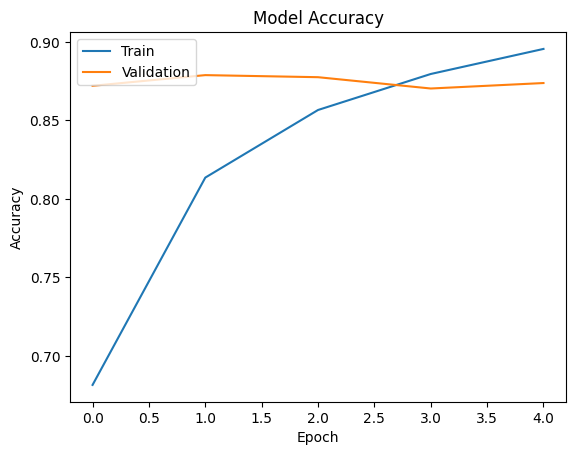

In [66]:
# Plot the training vs validation accuracy
plt.plot(mod_1.history["accuracy"])
plt.plot(mod_1.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



782/782 [==============================] - 4s 5ms/step


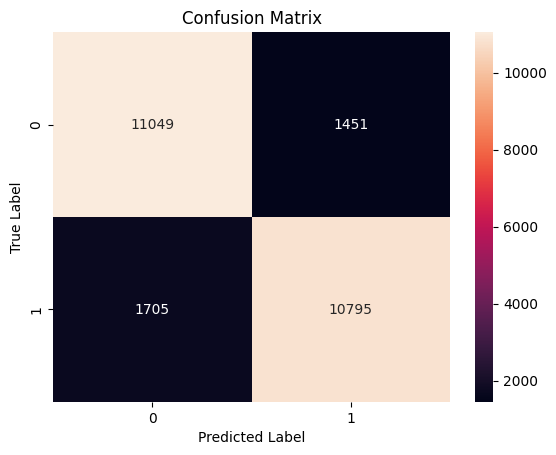

In [68]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Create the confusion matrix
con_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(con_mat, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [69]:
# print the classification report
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     12500
           1       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000

